# EDA Parameter extraction

## 1. Import packages and load the data 
Last time, we saved the data in pkl format that preserves the structure of python variable. 

In [1]:
import pandas as pd  
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt
import pickle

# File path to the pickle file
derivative_folder = '/Users/erwin/Documents/ProjectPsychophysiologyResources/preprocessed-data/'
output_filename = derivative_folder + 'preprocessed_eda.pkl'

# Load the pickle file
with open(output_filename, 'rb') as f:
    loaded_data = pickle.load(f)
    
# Display the loaded data
print(loaded_data)

0          NaN
100        NaN
200        NaN
300        NaN
400        NaN
         ...  
32700    212.5
32800    212.1
32900    211.6
33000    211.1
33100    210.6
Name: EDA, Length: 332, dtype: float64


## 2. Extract parameters

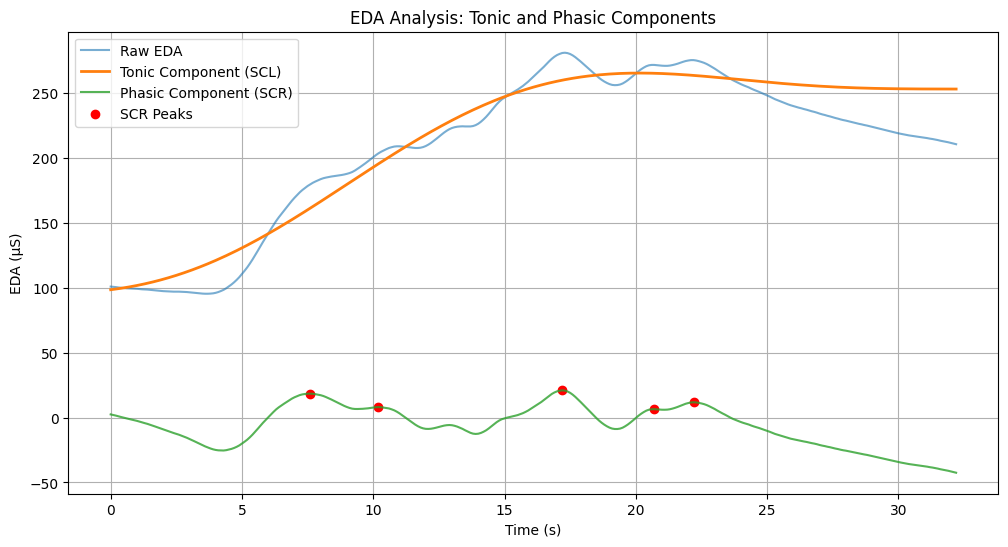

In [10]:
# Extract the EDA data from loaded_data (assuming the structure matches the example)
eda_data = loaded_data.dropna().values  # Drop NaN values
sampling_frequency = 10  # Downsampled to 10 Hz
time = np.arange(len(eda_data)) / sampling_frequency

# 1. Extract the Tonic Component (SCL) using low-pass filtering
def low_pass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

cutoff_frequency = 0.05  # Cutoff for tonic (very slow changes)
tonic_component = low_pass_filter(eda_data, cutoff_frequency, sampling_frequency)

# 2. Extract the Phasic Component (SCR) by subtracting the tonic from the original
phasic_component = eda_data - tonic_component

# Detect SCR peaks in the phasic component
peak_threshold = 0.02  
peaks, _ = find_peaks(phasic_component, height=peak_threshold, distance=sampling_frequency)

# Compute SCR amplitude (height of detected peaks)
scr_amplitudes = phasic_component[peaks]

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(time, eda_data, label="Raw EDA", alpha=0.6)
plt.plot(time, tonic_component, label="Tonic Component (SCL)", linewidth=2)
plt.plot(time, phasic_component, label="Phasic Component (SCR)", alpha=0.8)
plt.scatter(peaks / sampling_frequency, scr_amplitudes, color="red", label="SCR Peaks")
plt.xlabel("Time (s)")
plt.ylabel("EDA (µS)")
plt.title("EDA Analysis: Tonic and Phasic Components")
plt.legend()
plt.grid(True)
plt.show()
